# Generere en graf til graf-dagen
Her er det vi trenger for å kunne re-genererer grafen til graf-dagen

## Mål og strategi

*Målet* er å kunne gi en innføring i graf-teori og dens anvendelser uten å måtte gjøre for mange forberedelser.  
En viktig del er å bli kjent med bruken av *Grapgh Data Science Library* i **Neo4j**.

*Strategien* er å bygge et (stort) datasett som representerer en graf.  Vi lager den som en *tilfeldig graf* (*random graph*).  Det betyr at sannsynligheten for at en kant er med i grafen er lik for alle kanter [Erdõs-Rényi](erdos59random.pdf).  Å generere en tilfeldig graf med N noder er i utgangspunktet O(N^2).  Mange naturlig forekommende grafer har denne egenskapen; hvilken sannsynlighet vi skal bruke må eksperimenter vise.

I settet skal det finnes strukturer som er av interesse; en typisk ting å lete etter er en klikk (se nedenfor).  For å være sikker på at det vi skal lete etter faktisk finnes, genererer vi (for eksempel) klikker og legger dem inn.  Vi har en rekke egenskaper vi ønsker å demonstrere så vi legger inn mange greier.  Mer nedenfor.

Til slutt eksporerer vi den ferdige grafen i et format Neo4J kan lese.  Første del av "kurset" blir derfor å lese inn grafen, og legge den inn Neo4j.  

Det hele er altså å legge til rette for å lære Neo4J gjennom eksempler vi har konstruert for anledningen.

## Eksempel
For å illustrere skal vi bruke et datasett, inspirert av ingen ringere enn [Donal Knuth](https://en.wikipedia.org/wiki/Donald_Knuth): Personene i [Victor Hugos](https://en.wikipedia.org/wiki/Victor_Hugo) roman [Les Misérables](https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables) og deres relasjoner.  Formålet er bare å visualisere noe mindre, slik at vi kan "se" hva som skal skje.

Orginaldata er [her](https://github.com/MADStudioNU/lesmiserables-character-network).

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
with open("lesmiserables-character-network/parsed_data/jean-complete-node.csv", "r") as fd:
    noder_rå = fd.readlines()
#
# Bort med første linje
noder_rå = noder_rå[1:]

# Formatet er 
# "TH","Thénardier","Thénardier, innkeeper in Montfermeil, aka Jondrette"\n
# CSV av aller verste sort.  Vi snakker om "Quote-character Separated Values" :-(
# Hent ut det vi trenger, og lag noder

G = nx.Graph()
for n in noder_rå:
    _s = n.split('"')
    G.add_node(_s[1], Navn=_s[3], Rolle=_s[5])
#
print(f"Antall noder i grafen: {G.number_of_nodes()}")

# Kantene
with open("lesmiserables-character-network/parsed_data/jean-complete-edge.csv", "r") as fd:
    kanter_rå = fd.readlines()
#
# Bort med første
kanter_rå = kanter_rå[1:]
print(f"Antall kanter: {len(kanter_rå)}")
#Formatet er 
# "MY","NP","Undirected","1","1.1.1" 
# hvor 1.1.1 er kapittelet hvor forbindelsen opptrer
for k in kanter_rå:
    _s = k.split(",")
    _ = G.add_edge(_s[0][1:3], _s[1][1:3])

Antall noder i grafen: 181
Antall kanter: 1589


Vise frem hele grafen

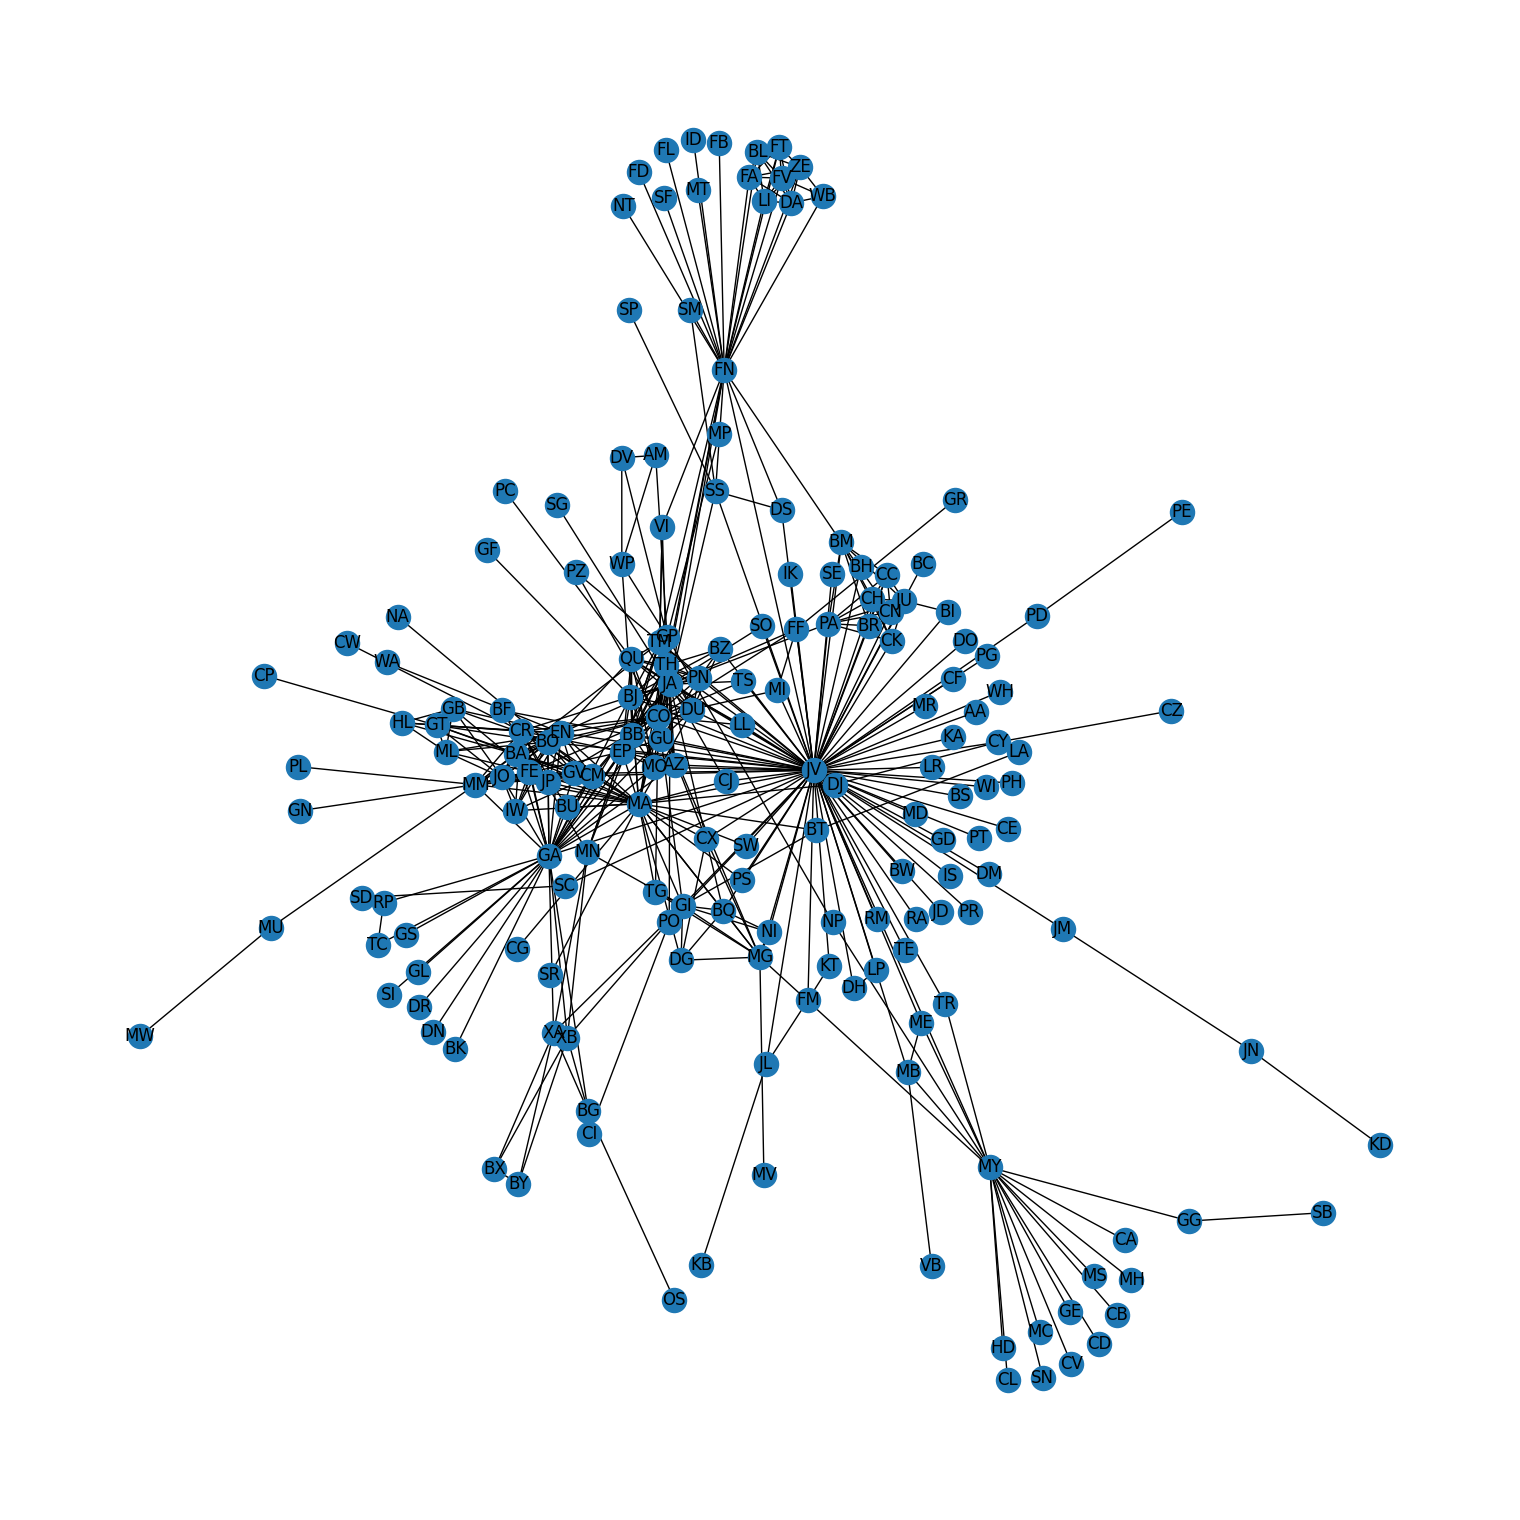

In [6]:

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)  # Be nodene spre seg utover så godt de kan
nx.draw(G, pos, with_labels=True)


## Nomenklatur

### En klikk
En **klikk** er et sett med noder hvor alle har en forbindelse til alle andre.  En graf kan åpenbart ha ingen, én, eller mange klikker.  Vanligvis regner vi ikke med klikker som bar mindre enn tre medlemmer (fordi enhver kant mellom to noder da blir en klikk).  En (sub)graf som er en klikk sies å være **komplett**.  Naturligvis, alle deler av en komplett klikk er også en klikk; det interessante er å finne den maksimale klikken.

Om vi ser bort fra at at det å finne klikker i grafer lett kan bli NP-komplett ([Karp](https://en.wikipedia.org/wiki/Karp%27s_21_NP-complete_problems)) så er jo klikker steder i grafen hvor det er ekstra mye "kommunikasjon".  Hos oss lar vi klikker representere en "gjeng" hvor alle kjenner hver andre og samarbeider.

Største klikk: ['MM', 'MA', 'GA', 'CR', 'EN', 'GV', 'BO', 'JO', 'FE', 'BA', 'CM']


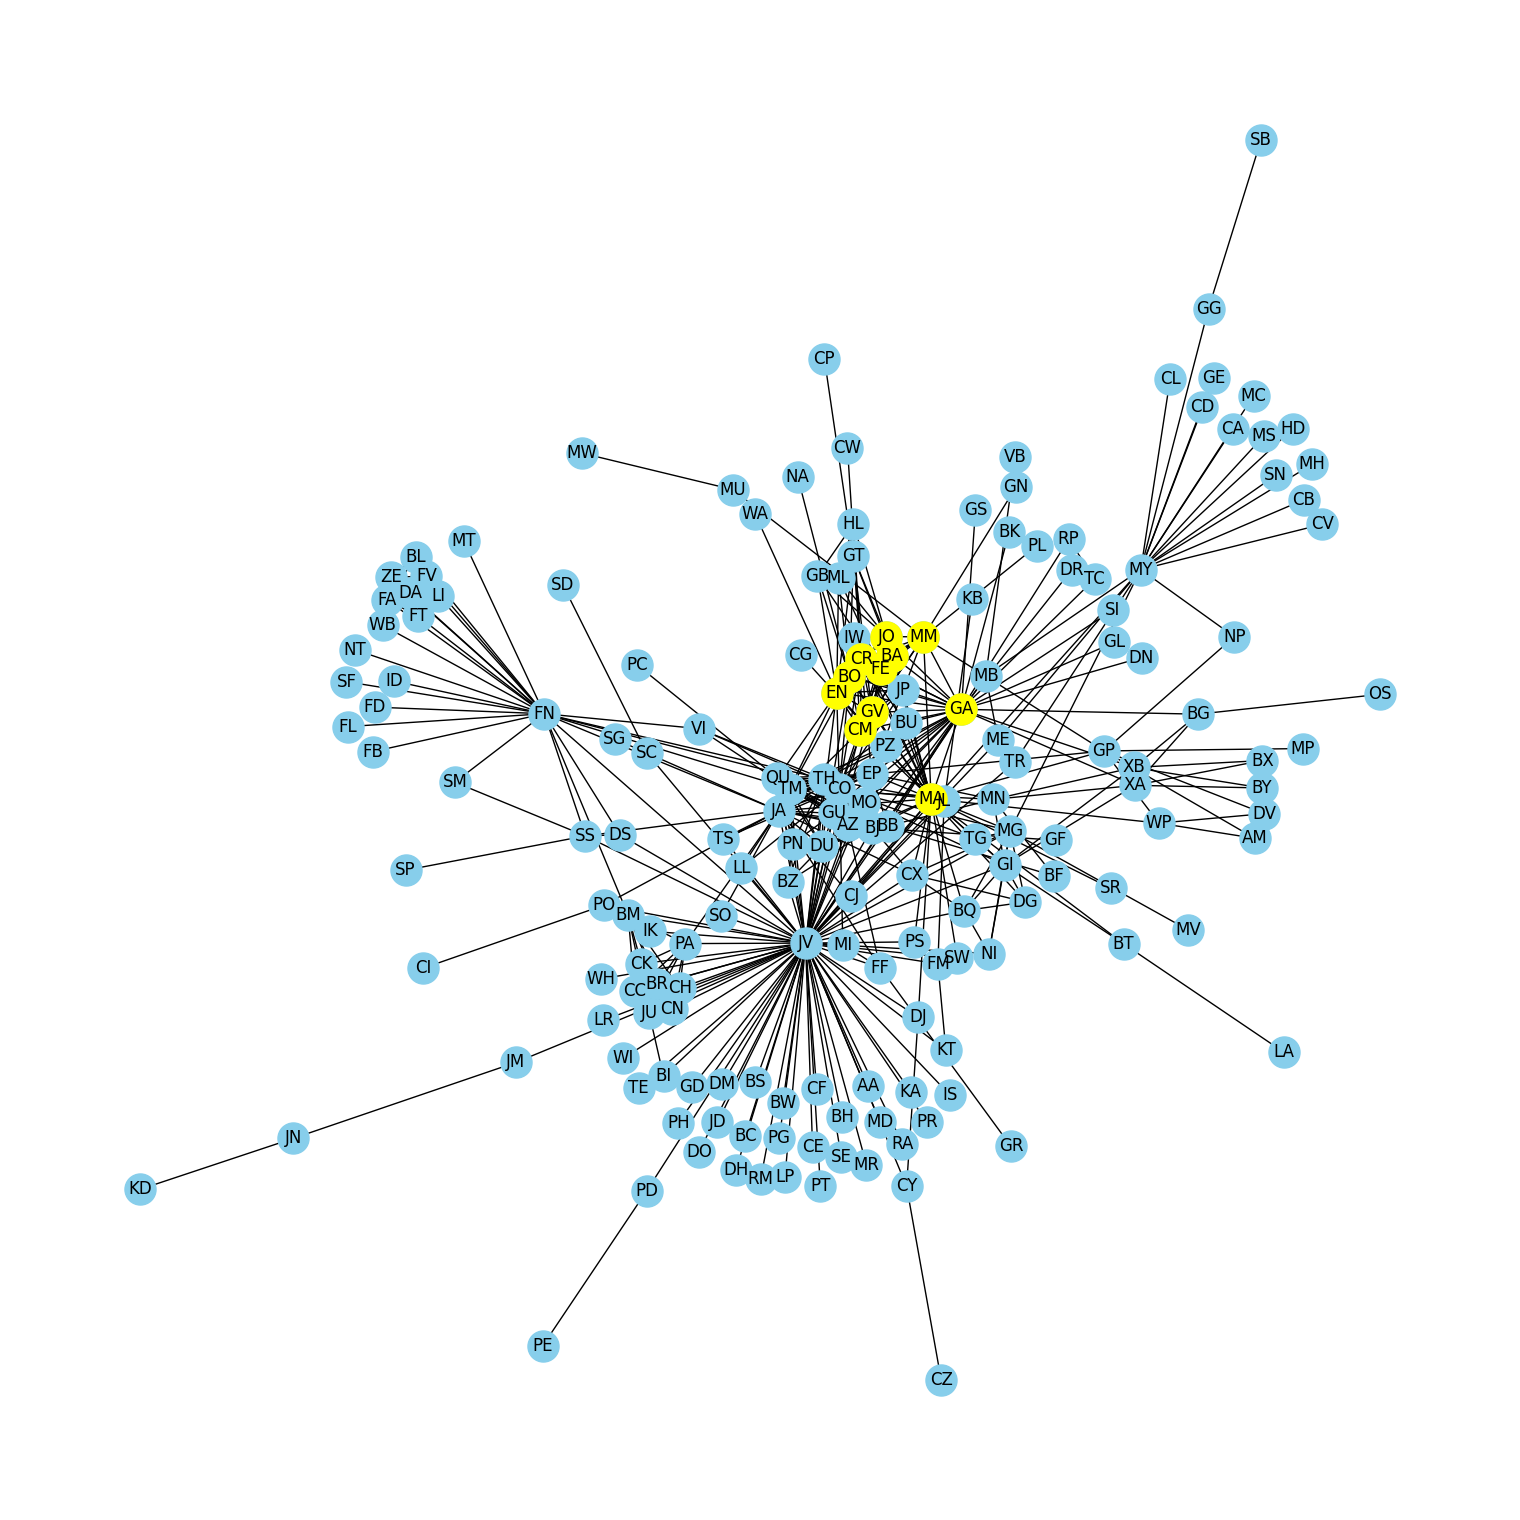

In [7]:
# Finn den største klikken i grafen
klikker = list(nx.find_cliques(G))
# Finn den lengste listen i listen av noder
klikk = max(klikker, key=len)

# Hvem er med
print("Største klikk:", klikk)

# Få se
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', font_size=12, node_size=500)

# Gi klikken en annen farge
nx.draw_networkx_nodes(G, pos, nodelist=klikk, node_color='yellow', node_size=500)
plt.show()

Det er mulig å hente ut klikken

	 EN {'Navn': 'Enjolras', 'Rolle': 'Enjolras, chief of Friends of the ABC'}
	 GV {'Navn': 'Government troops', 'Rolle': 'Government troops'}
	 BO {'Navn': 'Bossuet', 'Rolle': 'Bossuet (Lesgle), member, Friends of the ABC'}
	 MM {'Navn': 'M. Mabeuf', 'Rolle': 'M. Mabeuf, warden of St. Sulpice, bibliophile'}
	 FE {'Navn': 'Feuilly', 'Rolle': 'Feuilly, member, Friends of the ABC'}
	 BA {'Navn': 'Bahorel', 'Rolle': 'Bahorel, member, Friends of the ABC'}
	 CR {'Navn': 'Courfeyrac', 'Rolle': 'Courfeyrac, member, Friends of the ABC'}
	 GA {'Navn': 'Gavroche', 'Rolle': 'Gavroche, son of the Thénardiers'}
	 JO {'Navn': 'Joly', 'Rolle': 'Joly, member Friends of the ABC'}
	 CM {'Navn': 'Combeferre', 'Rolle': 'Combeferre, member, Friends of the ABC'}
	 MA {'Navn': 'Marius', 'Rolle': 'Marius'}


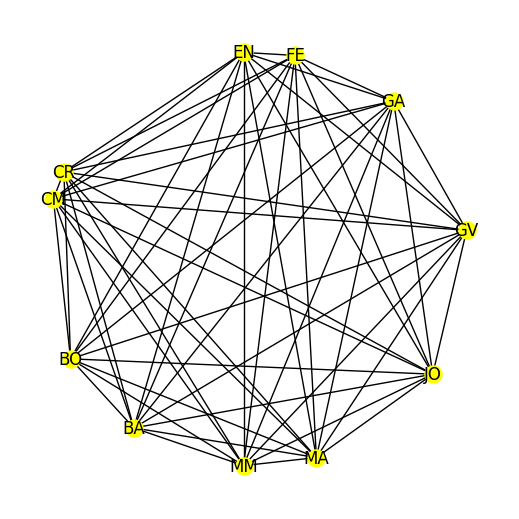

In [8]:

sg = G.subgraph(klikk)
for n in sg:
    print("\t", n, sg.nodes[n])
# 
plt.figure(figsize=(5, 5))
pos = nx.circular_layout(G)
nx.draw(sg, pos, with_labels=True, node_color='yellow', node_size=150)

At den største klikken er såpass liten er nok fordi dette er en roman og ingen "kjenner" hverandre utover det som er relevant for handlingen; hvem sa at litteraturen er eneste stedet mennesket har ekte frihet :-)

###  Bronode
En **bronode** (eng: *betweenness centrality*) er en node som knytter andre (sett av) noder sammen.  Det vil si en node som mye vil passere gjennom når det sprer seg utover i grafen.  

Teknisk betyr det være på *korteste sti* mellom mange sett av noder.

### Populær node
En node blir **populær** (eng: *degree centrality*) når den har mange forbindelser (relativt til resten av grafen).

### Sentral node
En **bronode** ligger på korteste sti for mange (par av) noder.  En **sentral** node (eng: *closeness centrality*) har lav sum av korteste sti 
til andre noder.  Det vil si at informasjon fra andre steder i grafen når denne noden raskt.
Det er en klar sammenheng mellom **bronoder** og **sentrale noder**.

In [9]:
# Beregne de tre viktigste typene sentralitet

populæritet = nx.degree_centrality(G)
broer = nx.betweenness_centrality(G)
sentrale = nx.closeness_centrality(G)

top_populære_noder = sorted(populæritet, key=populæritet.get, reverse=True)[:5]
top_bronoder = sorted(broer, key=broer.get, reverse=True)[:5]
top_sentrale = sorted(sentrale, key=sentrale.get, reverse=True)[:5]

print("5 mest populære:")
for n in top_populære_noder:
    print("\t", n, G.nodes[n])
#
print("5 viktigste bronoder")
for n in top_bronoder:
    print("\t", n, G.nodes[n])
#
print("5 mest sentrale noder:")
for n in top_sentrale:
    print("\t", n, G.nodes[n])
#   


5 mest populære:
	 JV {'Navn': 'Jean Valjean', 'Rolle': 'Jean Valjean'}
	 MA {'Navn': 'Marius', 'Rolle': 'Marius'}
	 GA {'Navn': 'Gavroche', 'Rolle': 'Gavroche, son of the Thénardiers'}
	 JA {'Navn': 'Javert', 'Rolle': 'Javert, police officer'}
	 FN {'Navn': 'Fantine', 'Rolle': 'Fantine, mistress of Tholomyès'}
5 viktigste bronoder
	 JV {'Navn': 'Jean Valjean', 'Rolle': 'Jean Valjean'}
	 FN {'Navn': 'Fantine', 'Rolle': 'Fantine, mistress of Tholomyès'}
	 GA {'Navn': 'Gavroche', 'Rolle': 'Gavroche, son of the Thénardiers'}
	 MY {'Navn': 'Bishop Myriel', 'Rolle': 'M. Myriel, Bishop of Digne'}
	 MA {'Navn': 'Marius', 'Rolle': 'Marius'}
5 mest sentrale noder:
	 JV {'Navn': 'Jean Valjean', 'Rolle': 'Jean Valjean'}
	 JA {'Navn': 'Javert', 'Rolle': 'Javert, police officer'}
	 MA {'Navn': 'Marius', 'Rolle': 'Marius'}
	 CO {'Navn': 'Cosette', 'Rolle': 'Cosette, daughter of Fantine'}
	 GA {'Navn': 'Gavroche', 'Rolle': 'Gavroche, son of the Thénardiers'}


Tegne bronoder som et tre

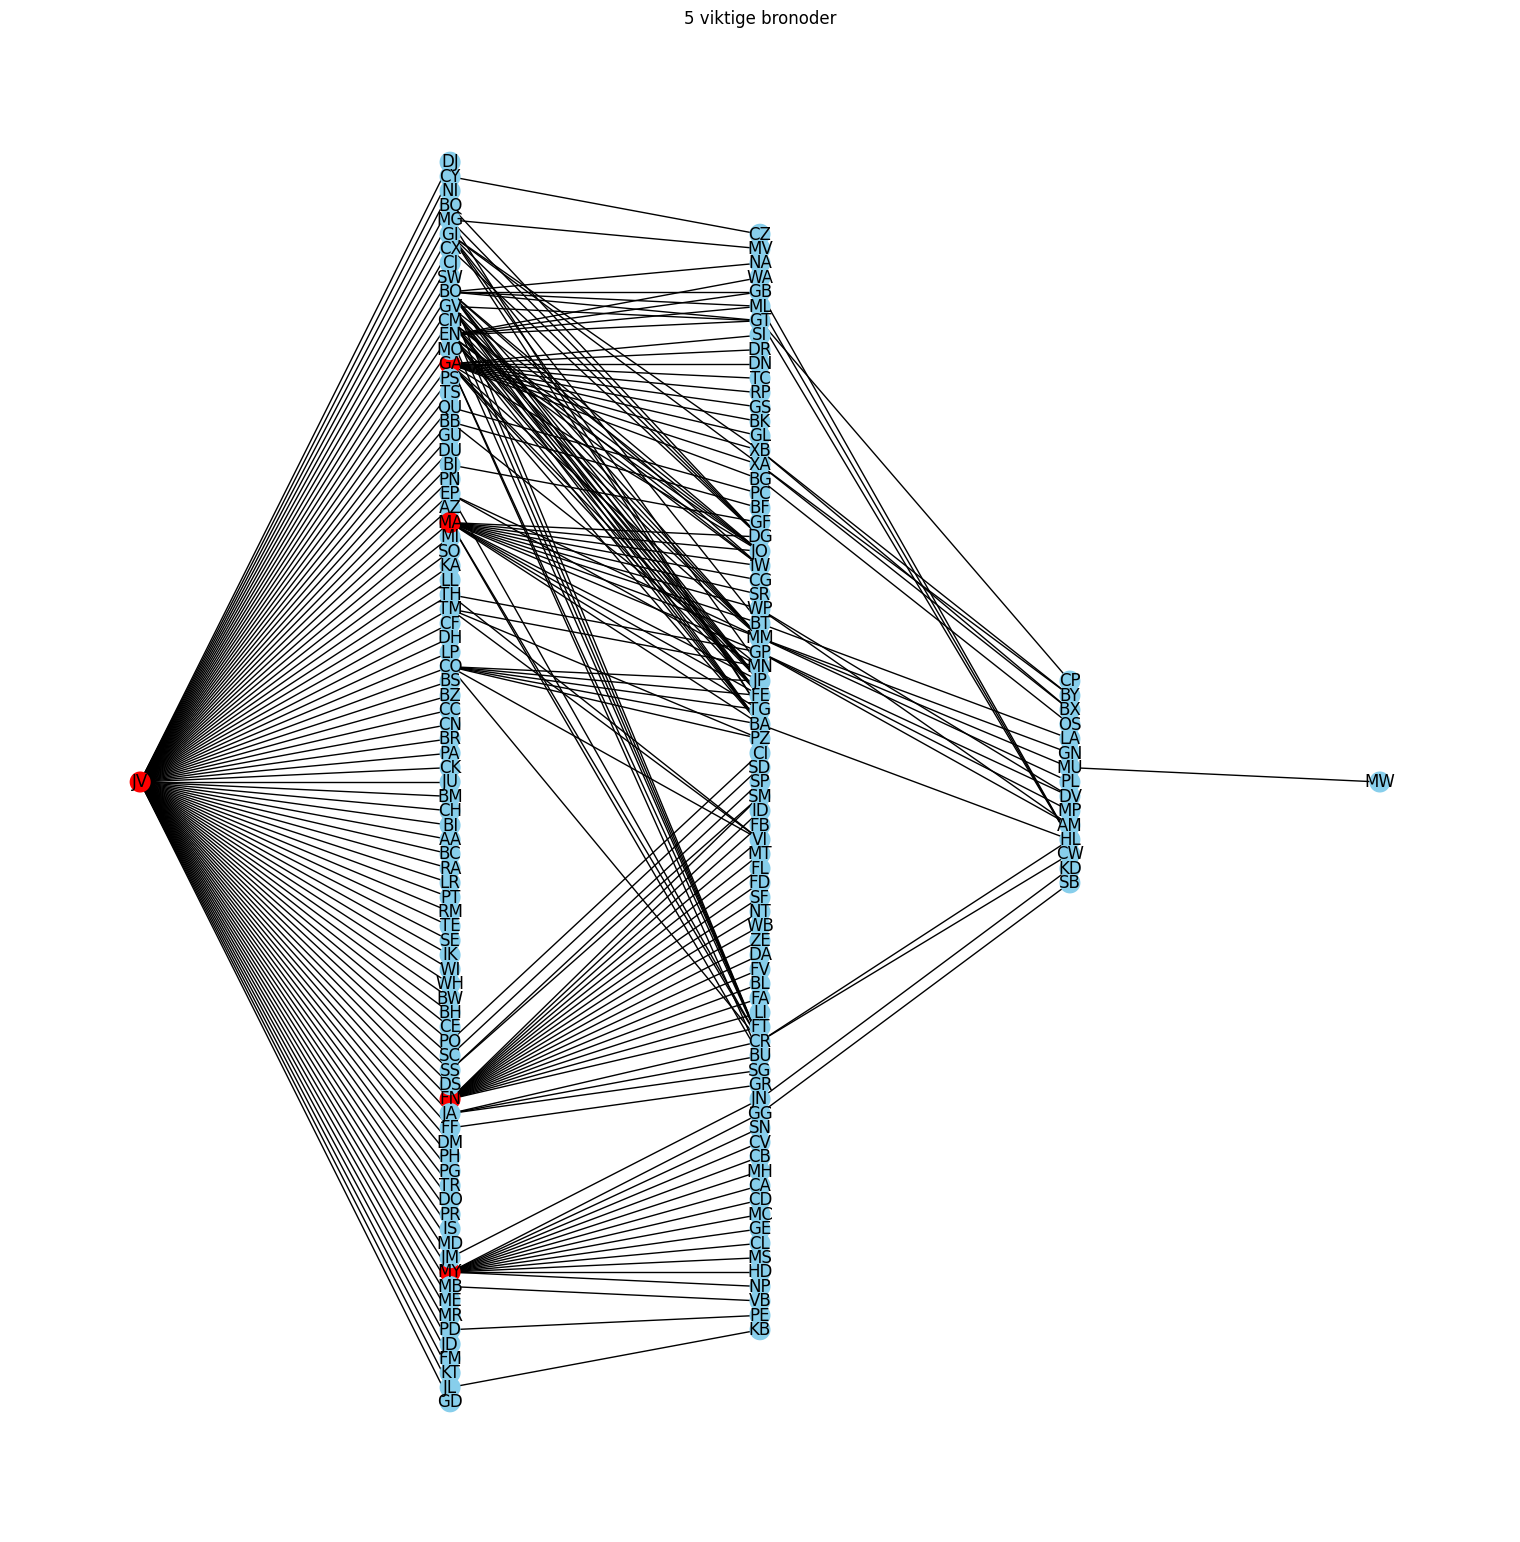

In [21]:

plt.figure(figsize=(15, 15))
node_farge = []
for n in G.nodes():
    if n in top_bronoder:
        node_farge += ["red"]
    else:
        node_farge += ["skyblue"]
    #
# Eller om du vil lese fra høyre mot venstre: ['red' if node in top_bronoder else 'skyblue' for node in G.nodes()]
pos = nx.bfs_layout(G, start="JV")  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_color=node_farge, node_size=200)
plt.title("5 viktige bronoder")
plt.show()

### Viktige noder ("page rank")
Den rekursive definisjonen sier at en node blir **viktig** dersom de den har forbindelse til er viktige.  Vi starter med å telle antall kanter 
inn til en node (som gir en første indikasjon på hvor viktig noden er).  Så øker vi viktigheten dersom naboene er viktige.  Kalles populært *page rank*, altså "Google".

For matematisk bakgrunn se [Eigenvektor centrality](https://en.wikipedia.org/wiki/Eigenvector_centrality).


In [11]:
# Beregne de viktigste nodene

page_rank = nx.eigenvector_centrality(G)

viktigste_noder = sorted(page_rank, key=page_rank.get, reverse=True)[:5]

print("5 mest populære:")
for n in viktigste_noder:
    print("\t", n, G.nodes[n])
#   

# Få se
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', font_size=12, node_size=500)

# Gi klikken en annen farge
nx.draw_networkx_nodes(G, pos, nodelist=klikk, node_color='yellow', node_size=500)
plt.show()

plt.figure(figsize=(15, 15))
node_farge = []
for n in G.nodes():
    if n in viktige_noder:
        node_farge += ["red"]
    else:
        node_farge += ["skyblue"]
    #
#"
pos = nx.bfs_layout(G,
nx.draw(G, pos, with_labels=True, node_color=node_farge, node_size=200)
plt.title("5 viktige bronoder")
plt.show()

5 mest populære:
	 JV {'Navn': 'Jean Valjean', 'Rolle': 'Jean Valjean'}
	 MA {'Navn': 'Marius', 'Rolle': 'Marius'}
	 GA {'Navn': 'Gavroche', 'Rolle': 'Gavroche, son of the Thénardiers'}
	 JA {'Navn': 'Javert', 'Rolle': 'Javert, police officer'}
	 CO {'Navn': 'Cosette', 'Rolle': 'Cosette, daughter of Fantine'}


### Tetthet
Hvor tett en graf er avhenger av forholdet mellom antall kanter (mellom noder) mot potensielt (totalt) antall kanter.  Når vi genererer en tilfeldig graf vil tettheten være en funksjon av sannsynligheten.


In [31]:
# Tettheten
tetthet = nx.density(G)
print(f"Grafens tetthet: {tetthet:.4f}")

Grafens tetthet: 0.0300


### Diameter
Den lengste korteste sti; gir et mål på maksimal avstand mellom deltagerne (nodene).  I en tilfeldig graf vil diameteren være en funksjon av antall noder.

In [32]:
# Grafens diameter
# Husk: Diameter er bare gyldig i grafer som ikke er delt.
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print(f"Diameter: {diameter}")
else:
    # Dersom grafen er delt, finn største subgraf, og se på den
    største_sg = max(nx.connected_components(G), key=len)
    subgraf = G.subgraph(største_sg)
    diameter = nx.diameter(subgraf)
    print(f"Diameter (største del): {diameter}")

Diameter: 7


Dette er en roman, og med en tetthet på bare 0.03 (3%) kan det synes som om de fleste personene ikke deltar direkte i handlingen, men kanskje som "staffasje" i scener.  Altså heller enn "Hun gikk på café" blir det "På caféen sto X som vanlig bak disken".

En diameter på 7, med en tetthet på bare 0.03, indikerer en graf med et par "tentakler" som strekker seg utover.  I handlingen kan det tyde på et par "digresjoner" hvor handlingen inkluderer person er som ellers ikke er med.

### Gjeng
Vi kan definere en **gjeng** som et sett av noder som "henger sammen" men som henger løst sammen med resten.  Vi kan bruke [Girvan-Newman](https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm) til å finne slike gjenger.  Konseptet med en bronode er at mange korteste-sti passerer gjennom noden (som gjør den sentral sett i lys av informasjonsspredning).  Vi kan flytte fokus til kantene, og legge vekt på kantene basert på hvor mange korteste-sti som gfår gjennom dem.  Ved å fjerne slike kanter fragmenteres grafen, og gjengene står igjen.

De som først separeres ut er de som har bronoder som har få (meen viktige) forbindelser til resten.

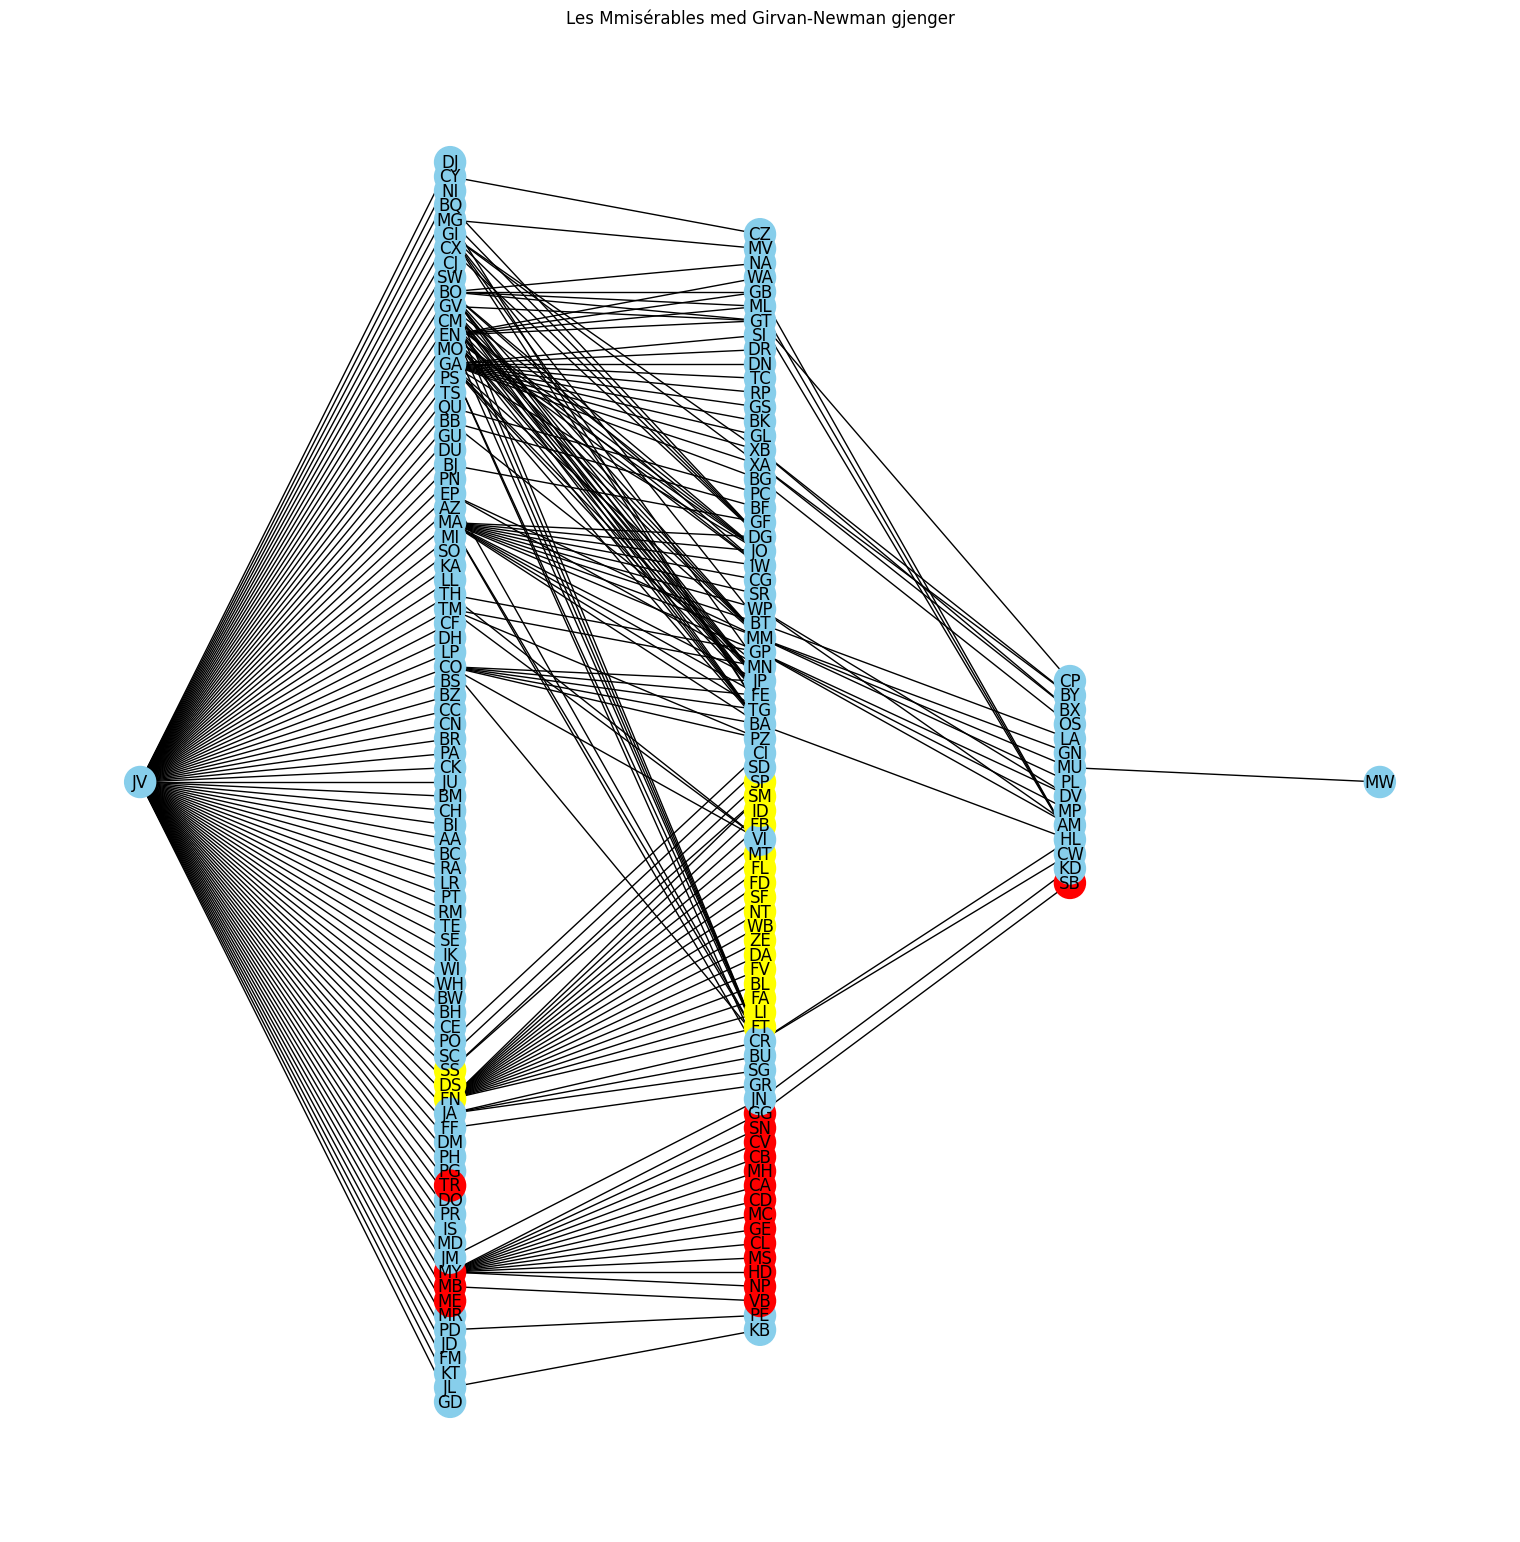

In [30]:
from networkx.algorithms.community import girvan_newman
gener = girvan_newman(G)
# Returnerer en generator
gjenger = []
for g in gener:
    gjenger += g
#
# Ta med de fire første (som er "resten" pluss tre)
gjenger = gjenger[:5]

node_farge= []
for n in G.nodes():
    if n in gjenger[3]:
        node_farge += ["yellow"]
    elif n in gjenger[2]:
        node_farge += ["skyblue"]
    elif n in gjenger[1]:
        node_farge += ["red"]
    else:
        node_farge += ["green"] # Skal ikke bli noen
    #
#

# Vis frem
pos = nx.bfs_layout(G, start="JV")
plt.figure(figsize=(15, 15))

nx.draw(G, pos, with_labels=True, node_color=node_farge, font_size=12, node_size=500)
plt.title("Les Mmisérables med Girvan-Newman gjenger")
plt.show()

## Fremgangsmåte

Vi bruker [NetworkX](https://networkx.org/documentation/stable/index.html) til å genererer opp grafen vår.  
Fordi det er utfordringer med formatene, vi vil eksportere til JSON og bruke Python til å legge noder og kanter inn i Neo4j.

# Økonomisk kriminalitet
Formålet her er ikke å undervise i økonomisk kriminalitet.  Eksemplene vi har valgt er derfor syntetiske.

## Datamodell

Vi velger en (svært) enkel datamodell som "til en viss grad" reflekterer økonomisk kriminalitet.

### Noder
Følgende er noder:
- Peroner: Har relasjoner til andre personer, eier konti, og gjennomfører transkasjoner;
- Konto som tilhører en person, og
- Transaksjoner (relasjonene til konto og person gir kontekst).

### Relasjoner (kanter)
- **kjenner** er relasjonen mellom to personer.  Det er åpenbart en (veldig) forenkling av virkeliheten, med godt nok.
- **Kontoeier** er relasjonen fra en konto til en person
- Noden Transaksjon har ENTEN tre kanten (til to konti, én merket **fra** og én merket **til**) og én til en person (som utførte transaksjonen) ELLER to kanter hvor den ene går til personen og den andre til en konto.  I dette tilfellet er transkasjonen merket med "type" som er enten "uttak" eller "innskudd".  I alle tilfeller har transaksjonen et beløp.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import uuid
import scipy
from datetime import datetime, timedelta

Norske navn fra SSB som vi legger til nodene

In [2]:
# Norske navn
ordliste = []
with open("ordliste.txt", "r") as fd:
    for linje in fd:
        ordliste.append(linje.split("|")[1])
    #
#

Slik ser en person ut, go alle personer har konto (i det minste for tiden).  Alle noder har en UUID4 som identifikator for å sikre oss mot kollisjoner på selve identifikatoren.

In [3]:
def lag_person_konto(G, 
                     navn=random.choice(ordliste)):
    id = str(uuid.uuid4())
    G.add_node(id, person=True)
    G.nodes[id]["navn"] = navn
    kto = str(uuid.uuid4())
    G.add_node(kto, konto=True)
    G.add_edge(id, kto, kontoeier=True)
    return (id, kto)
#fed

### "Money Mule"
Alle medlemmene i en klikk, unntatt én som vi kaller M, tar ut penger.  Deretter (i tid) setter Bakmannen, som M har relasjon til, et beløp som er noe mindre enn summen av det som er tatt ut.  Det endelige innskuddet skjer naturligvis en stund etter at alle uttakene er gjort.
Uttakene spres utover i tid (fra nå og fremover) og beløpet varierer opp til en grense.  M tar ikke ut penger (han får dem i kontanter).

Vi lager en klikk (og derfor en graf) og setter opp alle realsjonene.

Den skyldige er: Hogne: 16779219-7f58-4ec0-87c5-147daff81bae


<Figure size 500x500 with 0 Axes>

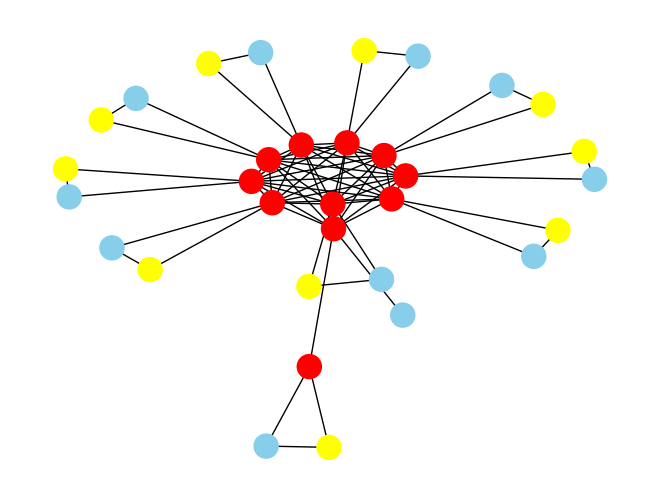

<Figure size 500x500 with 0 Axes>

In [5]:

def lag_money_mule(antall_personer, total_beløp):

    # Uttakene skjer innen dette vinduet
    vindu_uttak = 8 
    #ANtall dager senere innskuddet skjer
    når_skjer_innskuddet = 2
    
    # Lag en klikk.
    uid = []
    for i in range(antall_personer):
        uid.append(str(uuid.uuid4()))
    #
    G = nx.complete_graph(uid)
    # Sett typen til personer
    nx.set_node_attributes(G, True, "person") # OBS rekkefølgen på parametrene!
    nx.set_edge_attributes(G, True, "kjenner")

    # Legg til et navn
    for id in G.nodes:
        G.nodes[id]["navn"] = random.choice(ordliste)
    #
    # Finn den som skal være forbryteren
    M = random.choice(list(G.nodes()))
    print(f"Den skyldige er: {G.nodes[M]["navn"]}: {M}")

    # Lage konti (med random id) til alle deltagere
    noder = list(G.nodes())
    for n in noder:
        kto = f"konto-{n}"
        G.add_node(kto, konto=True)
        G.add_edge(n, kto, kontoeier=True)
    #
    # Legg til en bakmann med konto
    bakmann, bak_kto = lag_person_konto(G, "Bakmann")
    # M kjenner bakmannen
    G.add_edge(M, bakmann, kjenner=True)

    # Alle skal ta ut penger (kontanter)
    folk = []
    for n,p in list(G.nodes(data="person")):
        if p:
            folk.append(n)
        #
    #    
    
    # Disse to skal ikke ta ut penger
    folk.remove(bakmann)
    folk.remove(M)

    bak_beløp = 0 # Totalt beløp tatt ut
    for person in folk:
        id = str(uuid.uuid4())
        beløp = round(total_beløp * random.random(), 2)
        G.add_node(id, 
                   transaksjon = True,
                   uttak = True,
                   beløp=beløp,
                   tidspunkt = datetime.now() + timedelta(hours=vindu_uttak * random.random()))
        bak_beløp += beløp
        G.add_edge(id, person, transaksjon=True)
        # Finn personens konto ved å se på kantene ut fra personen
        for u, v, kto in G.edges([person], data=True):
            if "kontoeier" in kto:
                G.add_edge(id, v, transaksjon=True)
                break
            #
        #
    # for person

    # Bakmannen setter inn pengene, minus ca 25% neste dag
    id = str(uuid.uuid4())
    G.add_node(id,
               transaksjon = True,
               innskudd = True,
               beløp = bak_beløp - round(bak_beløp * random.random() * 0.25, 2), 
               tidspunkt = datetime.now() + timedelta(days=når_skjer_innskuddet))
    G.add_edge(id, bakmann, transaksjon=True)
    G.add_edge(id, bak_kto, transaksjon=True)

    return G
#fed

#
#
G = lag_money_mule(10, 1000)
#
#


# Fjern identifikatorene
#G = nx.convert_node_labels_to_integers(G)
# Tegne
node_farge = []
for n,d in G.nodes(data=True):
    if "person" in d:
        node_farge += ["red"]
    elif "konto" in d:
        node_farge += ["skyblue"]
    elif "transaksjon" in d:
        node_farge += ["yellow"]
    else:
        node_farge += ["green"]
    #
#
pos = nx.spring_layout(G)  # Be nodene spre seg utover så godt de kan
nx.draw(G, with_labels=False, node_color=node_farge, node_size=300)
plt.figure(figsize=(5,5))



### Bakmann
En som knytter sammen flere klikker

<Figure size 500x500 with 0 Axes>

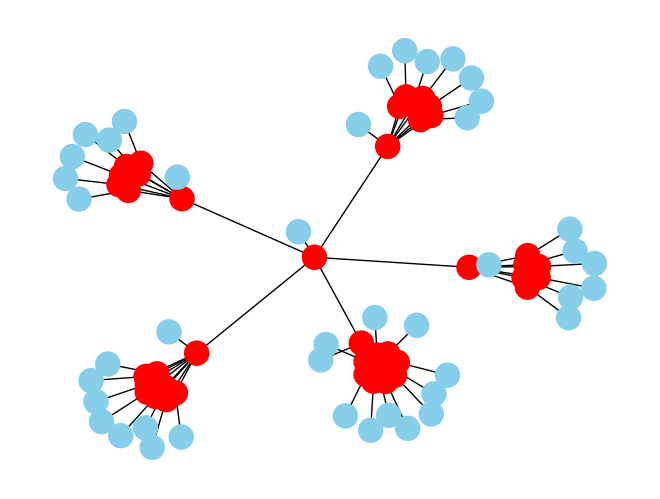

<Figure size 500x500 with 0 Axes>

In [5]:
def bakmann_klikker(antall_klikker, antall_personer):
    assert(antall_klikker > 0)
    assert(antall_personer > 0)
    
    klikker = []
    for k in range(antall_klikker):
        # Lag en klikk med et varierende antall personer rundt antallte
        antall = int(antall_personer + antall_personer/4*random.uniform(-1, 1))
        folk = []
        for f in range(antall):
            folk.append(str(uuid.uuid4()))
        #
        G = nx.complete_graph(folk)
        # Sett typen til personer
        nx.set_node_attributes(G, True, "person") # OBS rekkefølgen på parametrene!
        nx.set_edge_attributes(G, True, "kjenner")
        # Legg til et navn til alle
        for id in G.nodes():
            G.nodes[id]["navn"] = random.choice(ordliste)
        #
        
        # Lage konti (med random id) til alle deltagere
        noder = list(G.nodes())
        for n in noder:
            kto = f"konto-{n}"
            G.add_node(kto, konto=True)
            G.add_edge(n, kto, kontoeier=True)
        #
        klikker.append(G)
    #
    
    komplett = nx.Graph()
    # Legg til en bakmann med konto
    bakmann, bak_kto = lag_person_konto(komplett, "Bakmann")
    
    for klikk in range(len(klikker)):
        # velg en node i klikken
        kopi = list(klikker[klikk].nodes(data=True))        
        random.shuffle(kopi)
        # det skal være minst én person
        for n, d in kopi:
            if "person" in d:
                kontakt = n
                break
            #
        #
        # IDer i klikken som legges til får ID av typen 5-uuid4.
        komplett = nx.union(komplett, klikker[klikk], ("", f"{klikk}-"))
        komplett.add_edge(bakmann, f"{klikk}-{kontakt}", kjenner=True)
    #

    return(komplett)
#fed

G = bakmann_klikker(5, 10)
# Tegne
node_farge = []
for n,d in G.nodes(data=True):
    if "person" in d:
        node_farge += ["red"]
    elif "konto" in d:
        node_farge += ["skyblue"]
    elif "transaksjon" in d:
        node_farge += ["yellow"]
    else:
        node_farge += ["green"]
    #
#

pos = nx.spring_layout(G)  # Be nodene spre seg utover så godt de kan
nx.draw(G, with_labels=False, node_color=node_farge, node_size=300)
plt.figure(figsize=(5,5))


### Utbytte
Én stor transaksjon som tilsynelatende "spittes" i flere og sprer seg utover.  Det starter med et stort innskudd av kontanter, osm så spres utover flere personer.  Tiden skal føyte fremover, samtidig som beløpet blir mindre

Dele en pengesum på et antall mennesker, mer eller mindre jevnt, innen et max og et min per person

For N personer, del beløpet opp i N-biter, pluss-minus 20%.  LEgg det som måtte være igjen til én av dem

In [140]:
def del_beløp(beløp, antall):
    penger = []
    igjen = beløp
    for p in range(antall):
        andel = round(beløp / antall * random.uniform(0.8, 1.2), 2)
        penger.append(andel)
        igjen -= andel
    #
    if igjen > 0:
        penger[0] += round(igjen, 2)
    #
    return penger
#


In [137]:

a = del_beløp(5000, 5)
print(a)

ANdel 0 = 951.8
ANdel 1 = 841.56
ANdel 2 = 946.17
ANdel 3 = 937.83
ANdel 4 = 825.1
[1449.34, 841.56, 946.17, 937.83, 825.1]


In [138]:
# Er beløpet mindre enn dette, da beholder du det
MINIMUM_BELØP = 5000
CUT = 15 # inntil, i prosent

def del_utbyttet(G, bakmann, beløp, klokken):
    if beløp < MINIMUM_BELØP:
        print(f"Beløpet {beløp} deles ikke")
        return
    #
    print(f"Klar til å trekke cut av {beløp}")
    # ditt cut
    beløp -= round(int(beløp * random.randint(1, CUT) / 100), 2)
    print(f"Det som skal deles er: {beløp}")
    # Vi gjør jobben litt senere i dag
    tidspunkt = klokken + timedelta(days=random.random())
    # Hvor mange vi deler med avhenger av hvor stort beløpet er (logaritmisk, HEX)
    import math
    antall = round(math.log(beløp, 10))
    bøtter = del_beløp(beløp, antall)
    print(f"Beløpet {beløp} skal deles slik: {bøtter}")
    for b in bøtter:
        # Person å sende penger til
        person, kto = lag_person_konto(G)
        G.add_edge(bakmann, person, kjenner=True)
        # Finne bakmannens konto
        naboer = G[bakmann]
        b_kto = None
        for n in naboer:
            if "konto" in G.nodes[n]:
                b_kto = n
                break
            #
        #
        assert (n is not None)
        
        # Overfør pengene til hens konto
        t_id = str(uuid.uuid4())
        G.add_node(t_id,
                   transaksjon = True,
                   øverføring = True,
                   beløp=b,
                   tidspunkt = tidspunkt + timedelta(hours=random.random()))
        G.add_edge(t_id,
                   kto,
                   transaksjon=True)
        G.add_edge(t_id, 
                   b_kto,
                   transaksjon=True)
        G.add_edge(t_id, 
                   bakmann, #bakmannen gjør jobben 
                   person=True)
        # Så for hver av disse folkene, be dem gjøre det du nettopp har gjort (rekursivt)
        del_utbyttet(G, person, b, tidspunkt)
    #rof bøtter
#fed


Vi lager en bakmann, deler opp beløpet, og kaller rekursivt til beløpet er b rukt opp

In [141]:

def lag_deling_av_utbyttet(G, beløp):
 
    bakmann, bak_kto = lag_person_konto(G, "Bakmann")
    # Hen setter inn penger
    innskuddet = str(uuid.uuid4())
    nå = datetime.now()
    G.add_node(innskuddet,
               transaksjon = True,
               innskuddet = True,
               beløp = beløp,
               tidspunkt = nå)
    G.add_edge(innskuddet, bak_kto, transaksjon=True)
    G.add_edge(innskuddet, bakmann, transaksjon=True, innskudd=True)

    del_utbyttet(G, bakmann, beløp, nå+timedelta(hours=random.random()))
#

G = nx.Graph()
lag_deling_av_utbyttet(G, 100000)
#pos = nx.spring_layout(G)  # Be nodene spre seg utover så godt de kan
#nx.draw(G, with_labels=False, node_color=node_farge, node_size=300)
#plt.figure(figsize=(5,5))

Klar til å trekke cut av 100000
Det som skal deles er: 92000
Beløpet 92000 skal deles slik: [19405.99, 21395.99, 20152.91, 15166.51, 16526.62]
Klar til å trekke cut av 19405.99
Det som skal deles er: 18047.99
Beløpet 18047.99 skal deles slik: [4893.01, 3716.91, 4814.27, 4623.8]
Beløpet 4893.01 deles ikke
Beløpet 3716.91 deles ikke
Beløpet 4814.27 deles ikke
Beløpet 4623.8 deles ikke
Klar til å trekke cut av 21395.99
Det som skal deles er: 20754.99
Beløpet 20754.99 skal deles slik: [5660.389999999999, 4580.73, 5683.98, 4829.89]
Klar til å trekke cut av 5660.389999999999
Det som skal deles er: 5491.389999999999
Beløpet 5491.389999999999 skal deles slik: [1657.94, 1103.21, 1567.69, 1162.55]
Beløpet 1657.94 deles ikke
Beløpet 1103.21 deles ikke
Beløpet 1567.69 deles ikke
Beløpet 1162.55 deles ikke
Beløpet 4580.73 deles ikke
Klar til å trekke cut av 5683.98
Det som skal deles er: 5115.98
Beløpet 5115.98 skal deles slik: [1107.04, 1511.52, 1520.14, 1445.59]
Beløpet 1107.04 deles ikke
Beløpet

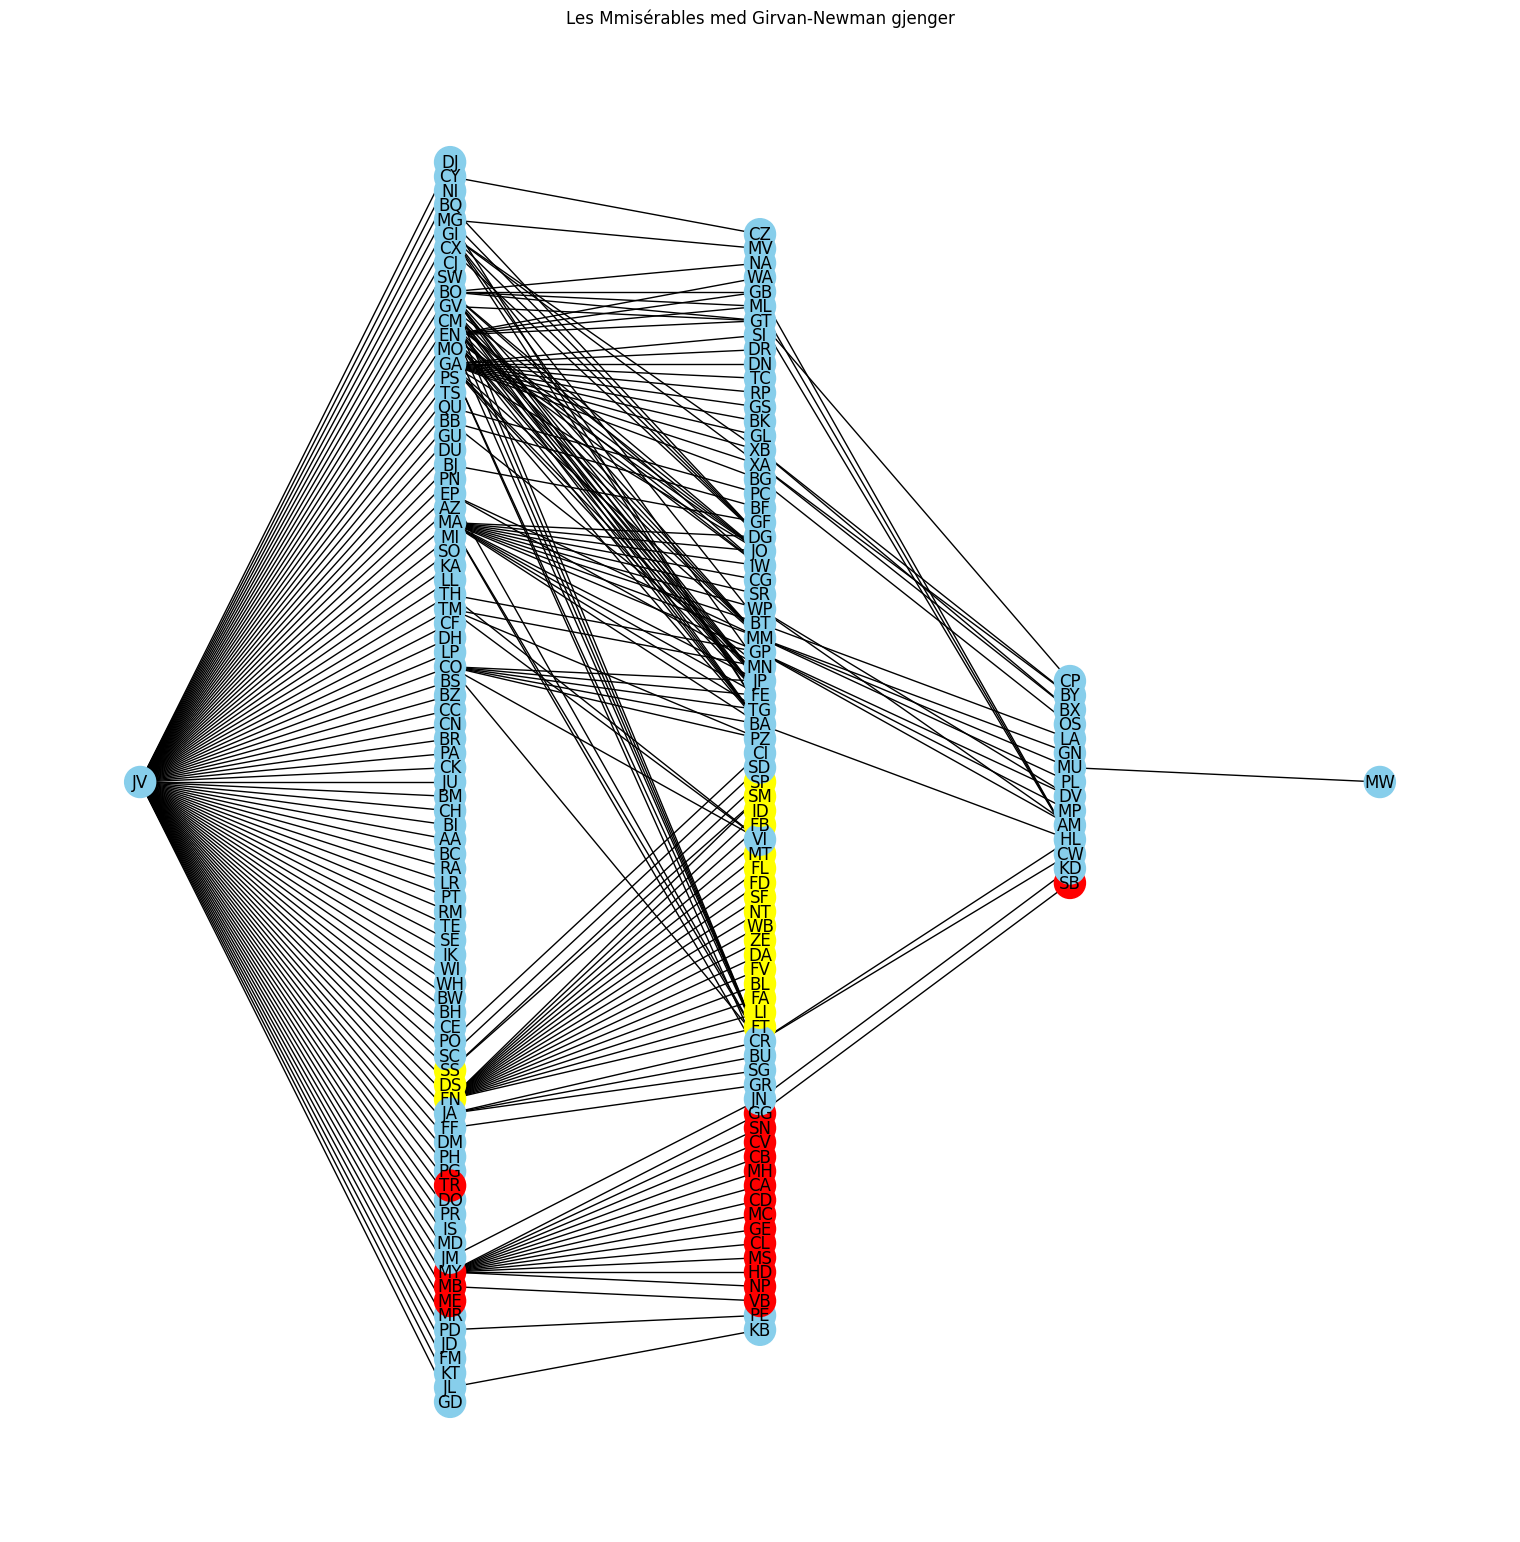

Se på klikken